In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Tolman-Eichenbaum-Machine

/content/gdrive/My Drive/Tolman-Eichenbaum-Machine


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
#sys.path.insert(0, 'model_files/')
sys.path.insert(0, 'generalising-structural-knowledge/')
from plotting_functions import *
from arb_functions import *
from helper_functions import *
from behaviour_analyses import *
from environment_functions import *

save_dirs = ['Summaries/']

date = '2021-01-01'
run = '0_social_hierarchy_initial_world_n_action=10' 

recent = -1
data, para, list_of_files, save_path = get_data(save_dirs, run, date, recent)

A_RNN, g2g, x_all, g_all, p_all, p_gen_all, acc_s_t_to, acc_s_t_from, positions, shinys, adj, timeseries = data
params, widths, batch_id, g_size, p_size, s_size, s_size_comp, n_freq, width, states = para

mult = 4 if params['world_type'] == 'tonegawa' else 4  # upsample
smoothing = 1
cmap = 'jet'
maxmin=True

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

shinys_, masks, g_lim, p_lim = sort_data(g_all=g_all, p_all=p_all, shinys=shinys, widths=widths, mult=1, smoothing=0, params=params, batch_id=batch_id, \
                                         g_max_0=False, p_max_0=True)

yesSummaries/2021-01-01/run0_social_hierarchy_initial_world_n_action=10/save
21555 11
538875
no p_timeseries


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)



In [17]:
env0 = 1
env1 = 2

In [6]:
params['widths']

[4, 4, 5, 5, 3, 3, 4, 4, 3, 5, 5, 4, 3, 4, 3, 5]

In [8]:
print(g_all[0].shape,g_all[2].shape,g_all[4].shape,g_all[5].shape)
df = g_all[0].T
np.concatenate((g_all[0].T,g_all[2].T,g_all[4].T,g_all[5].T)).shape

(31, 120) (63, 120) (15, 120) (15, 120)


ValueError: ignored

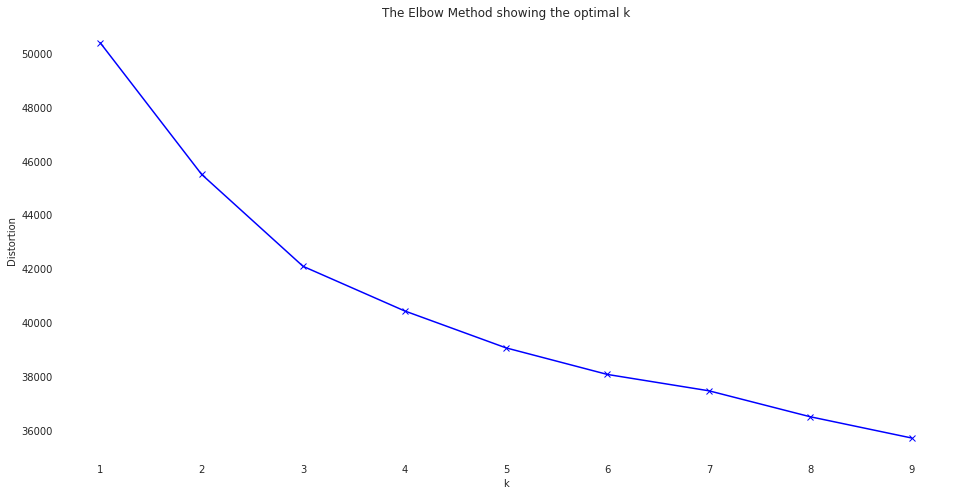

In [36]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

df = np.concatenate((p_all[2].T,p_all[3].T))

scaler = StandardScaler()
X_std = scaler.fit_transform(df)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=9)
    kmeanModel.fit(X_std)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [61]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
df = np.concatenate((g_all[2].T,g_all[3].T))

scaler = StandardScaler()
X_std = scaler.fit_transform(df)


kmeanModel = KMeans(n_clusters=2,random_state=9)
kmeanpred = kmeanModel.fit_predict(X_std)


affinityModel = AffinityPropagation(damping=0.9)
affinitypred = affinityModel.fit_predict(X_std)

agglomerativeModel = AgglomerativeClustering(n_clusters=2)
agglomerativepred = agglomerativeModel.fit_predict(X_std)

BirchModel = Birch(threshold=0.01, n_clusters=2)
Birchpred = BirchModel.fit_predict(X_std)

DBSCANModel = DBSCAN(eps=0.30, min_samples=9)
DBSCANpred = DBSCANModel.fit_predict(X_std)

MeanShiftModel = MeanShift()
MeanShiftpred = MeanShiftModel.fit_predict(X_std)

SpectralModel = SpectralClustering(n_clusters=2)
Spectralpred = SpectralModel.fit_predict(X_std)

GaussianMixture = GaussianMixture(n_components=2)
GaussianMixturepred = GaussianMixture.fit_predict(X_std)

np.count_nonzero(pred==1)

41

In [51]:
f = plt.figure(figsize=(60, 80))

for i in range(120):
    ax = plt.subplot(12, 10, i + 1)
    G=nx.Graph()
    for j in range(2**(params['widths'][env0])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env0][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="black" )
plt.show()
# f.savefig("g0_pedigree_like.pdf")
# plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

IndexError: ignored

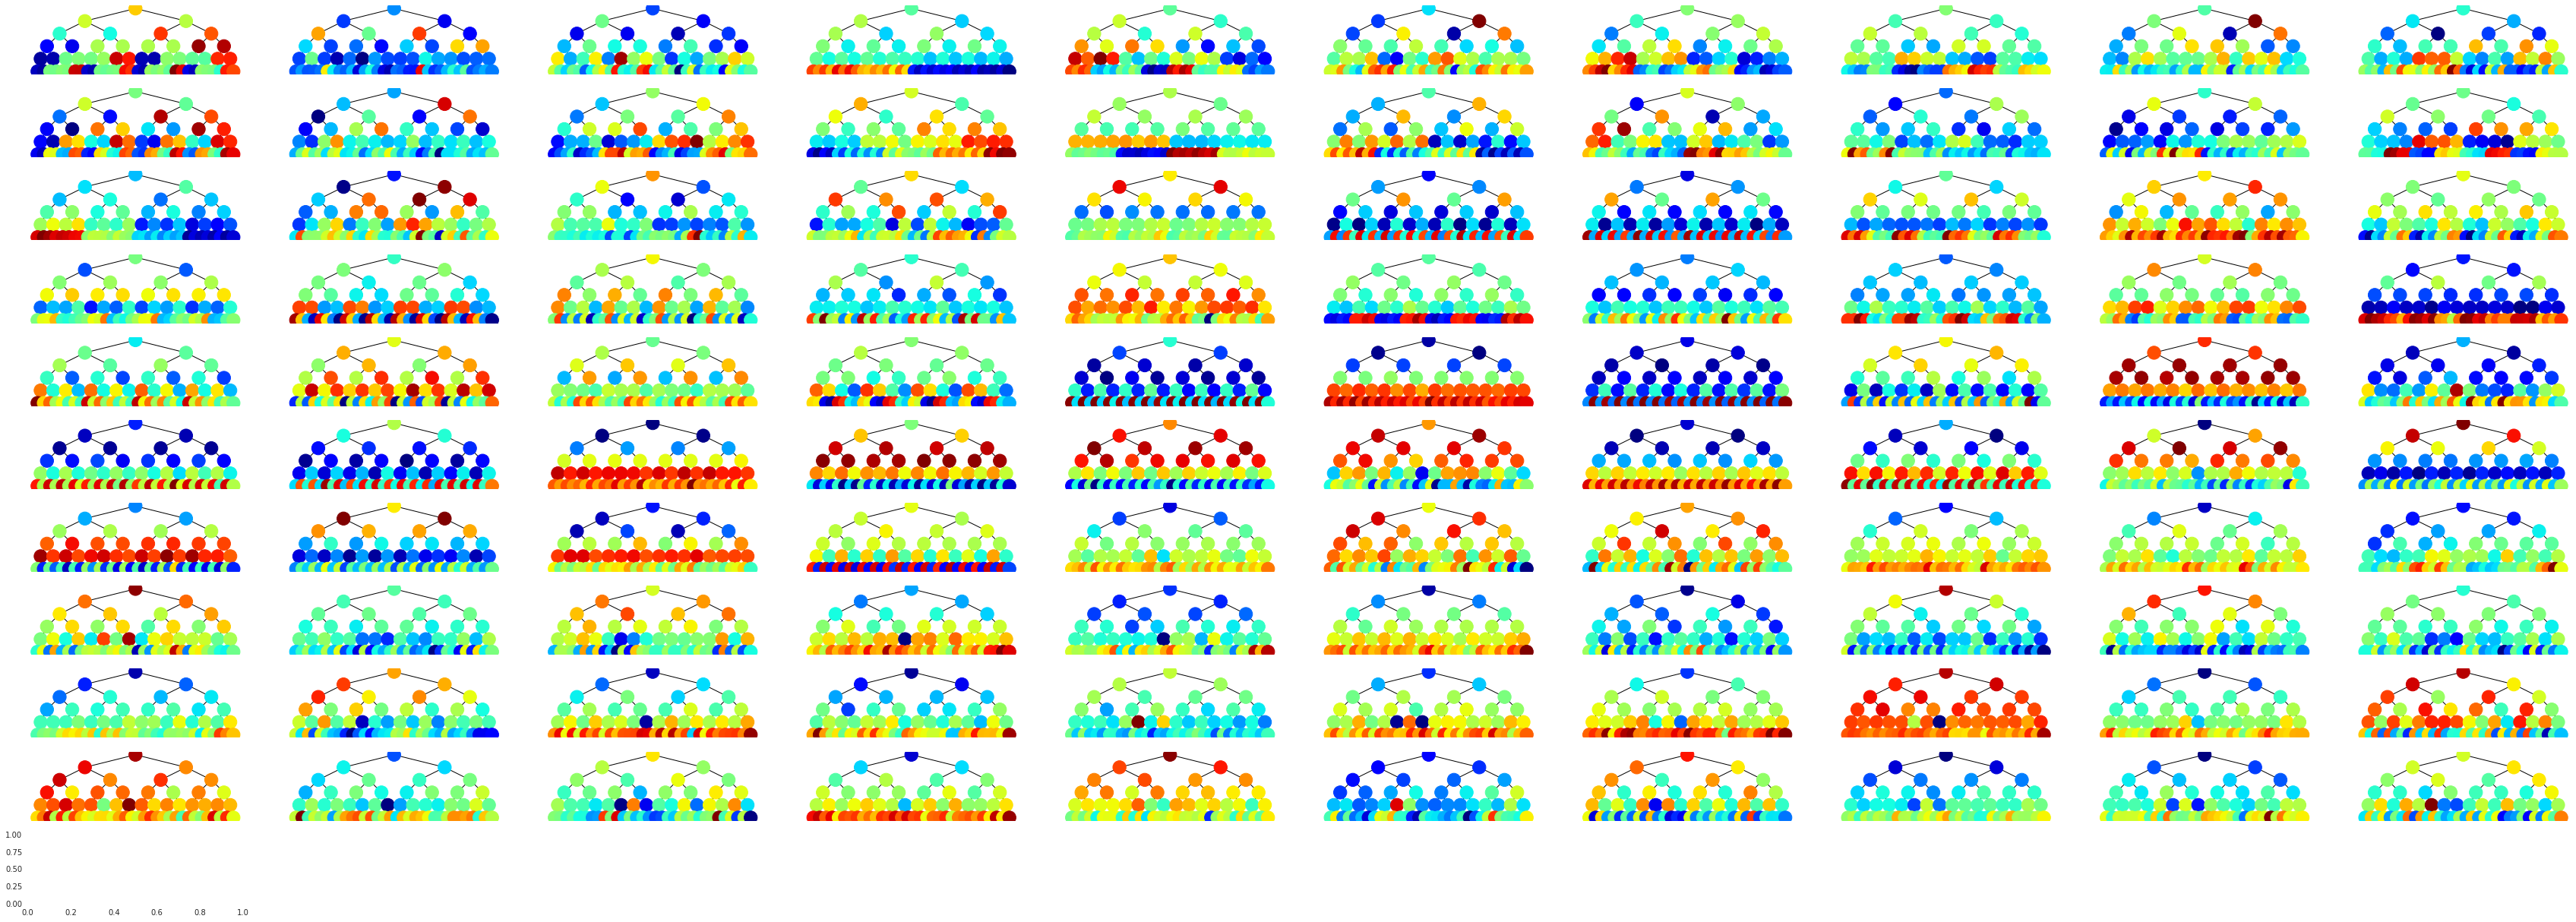

In [59]:
f = plt.figure(figsize=(60, 80))
loc=-1
for i in range(400):
  if(pred[i]==0):
    loc+=1
    ax = plt.subplot(40, 10, loc + 1)
    G=nx.Graph()
    for j in range(2**(params['widths'][env1])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env1][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="black" )
plt.show()
f.savefig("g1_kmeans_cluster0_n_actions=5.pdf")
plt.close("all")

In [ ]:
f = plt.figure(figsize=(60, 80))
loc=-1
for i in range(120):
  if(pred[i]==2):
    loc+=1
    ax = plt.subplot(12, 10, loc + 1)
    G=nx.Graph()
    for j in range(2**(params['widths'][env0])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env0][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="black" )
plt.show()

Output hidden; open in https://colab.research.google.com to view.